In [1]:
%reload_ext GPU

In [2]:
%%GPUCell

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
from IPython.display import display
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    res = sess.run(W) * train_X + sess.run(b)

Saving current environment... 
Executing GPU code.
('Epoch:', '0050', 'cost=', '0.155268326', 'W=', 0.40607232, 'b=', -0.32423052)
('Epoch:', '0100', 'cost=', '0.146221086', 'W=', 0.3967658, 'b=', -0.25728)
('Epoch:', '0150', 'cost=', '0.138218775', 'W=', 0.38801277, 'b=', -0.19431125)
('Epoch:', '0200', 'cost=', '0.131140709', 'W=', 0.37978032, 'b=', -0.13508745)
('Epoch:', '0250', 'cost=', '0.124880299', 'W=', 0.37203747, 'b=', -0.079386204)
('Epoch:', '0300', 'cost=', '0.119343027', 'W=', 0.36475512, 'b=', -0.026997665)
('Epoch:', '0350', 'cost=', '0.114445448', 'W=', 0.35790595, 'b=', 0.022275034)
('Epoch:', '0400', 'cost=', '0.110113673', 'W=', 0.3514641, 'b=', 0.068617195)
('Epoch:', '0450', 'cost=', '0.106282383', 'W=', 0.3454054, 'b=', 0.1122032)
('Epoch:', '0500', 'cost=', '0.102893770', 'W=', 0.3397071, 'b=', 0.15319698)
('Epoch:', '0550', 'cost=', '0.099896729', 'W=', 0.33434758, 'b=', 0.19175263)
('Epoch:', '0600', 'cost=', '0.097246021', 'W=', 0.32930684, 'b=', 0.22801521)

In [3]:
import matplotlib.pyplot as plt

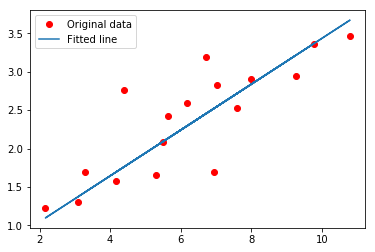

In [4]:


# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, res, label='Fitted line')
plt.legend()
plt.show()